# IIB40303 - PROGRAMMING FOR DATA ANALYTIC
#### GROUP ASSIGNMENT

>#### 1. AMIR BIN SAAHAL (52224223281)
>#### 2. MOHAMAD YUSRI BIN HAMIDON (5222422311)
>#### 3. MUHAMMAD HARIZ BIN ASRUL AZHAR (52224223249)
>#### 4. HANI KIASATINA BINTI HASSAN (52224223082)


### TITLE: DATA ANALYSIS ON NETFLIX MOVIES AND TV SHOWS

>#### Reference Dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows/data
>#### Link Video Presentation : https://youtu.be/ke04BE-Tqq4
>#### Link GitHub : https://github.com/amirsaahal/PROGRAMMING-FOR-DATA-ANALYTIC/tree/main

#### PART 1 - AMIR BIN SAAHAL (52224223281) - Import Libraries, Dataset Info, Missing Values

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# to use in missing value heatmap
!pip install missingno
import missingno as msno

# To ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
netflix = pd.read_csv("netflix/netflix_titles.csv")

In [3]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
netflix.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
netflix.shape

(8807, 12)

From the data sample is it clear that, data have total of 11 features with lots of mixed alpha numeric data.

In [6]:
# show the dataset info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
print ("This is the number of missing value")
netflix.isnull().sum()

This is the number of missing value


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

From info() method, it is clear that there is missing data and it is important to handle this missing data carefully. From above information, we have to handle object and integer data.

Next lets look at the statistics of both object and integer datatype.

In [8]:
netflix.describe(include = [object]).T.style.set_properties(**{
    'background-color': 'black',
    'color': 'white',
    'border-color': 'white'
})

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [9]:
netflix.describe(include = [int]).T.style.set_properties(**{
    'background-color': 'black',
    'color': 'white',
    'border-color': 'black'
})

,count,mean,std,min,25%,50%,75%,max
release_year,8807.000000,2014.180198,8.819312,1925.000000,2013.000000,2017.000000,2019.000000,2021.000000


> This two tables gives some information about unique values, topvalues, frequencies of topvalues.
Notably few features show some interesting stats
* type - 2 categories which is Movie and TV Show, most of it is Movie with 6131 movies.
* director - Rajiv Chilaka	 are directed 19 title, and they are by for on the top of the list.
* cast- David Attenborough is the only actor to act in many of the films and shows on netflix. For filling missing values, we will use actor_data_unknown.
* country - USA is producing the most, so lets use this value to fillna values.
* date_added - January 1, 2020 is the peak date on platform. So, lets consider this to handle missing values.
* rating - 17 categories are present, so it make sense to analyse this data to see how are audience and what age group netflix targeting.
* listed_in - there are nearly 500 unique entries in this column.
* release_year - this gives the chronological time line of produced content, here range of content is from 1925 to 2021, this could help us see how popular content from various years.
* descriptions - this could be helpful in understanding what kind of topics does content based on.


lets visualize the missing data

<Axes: >

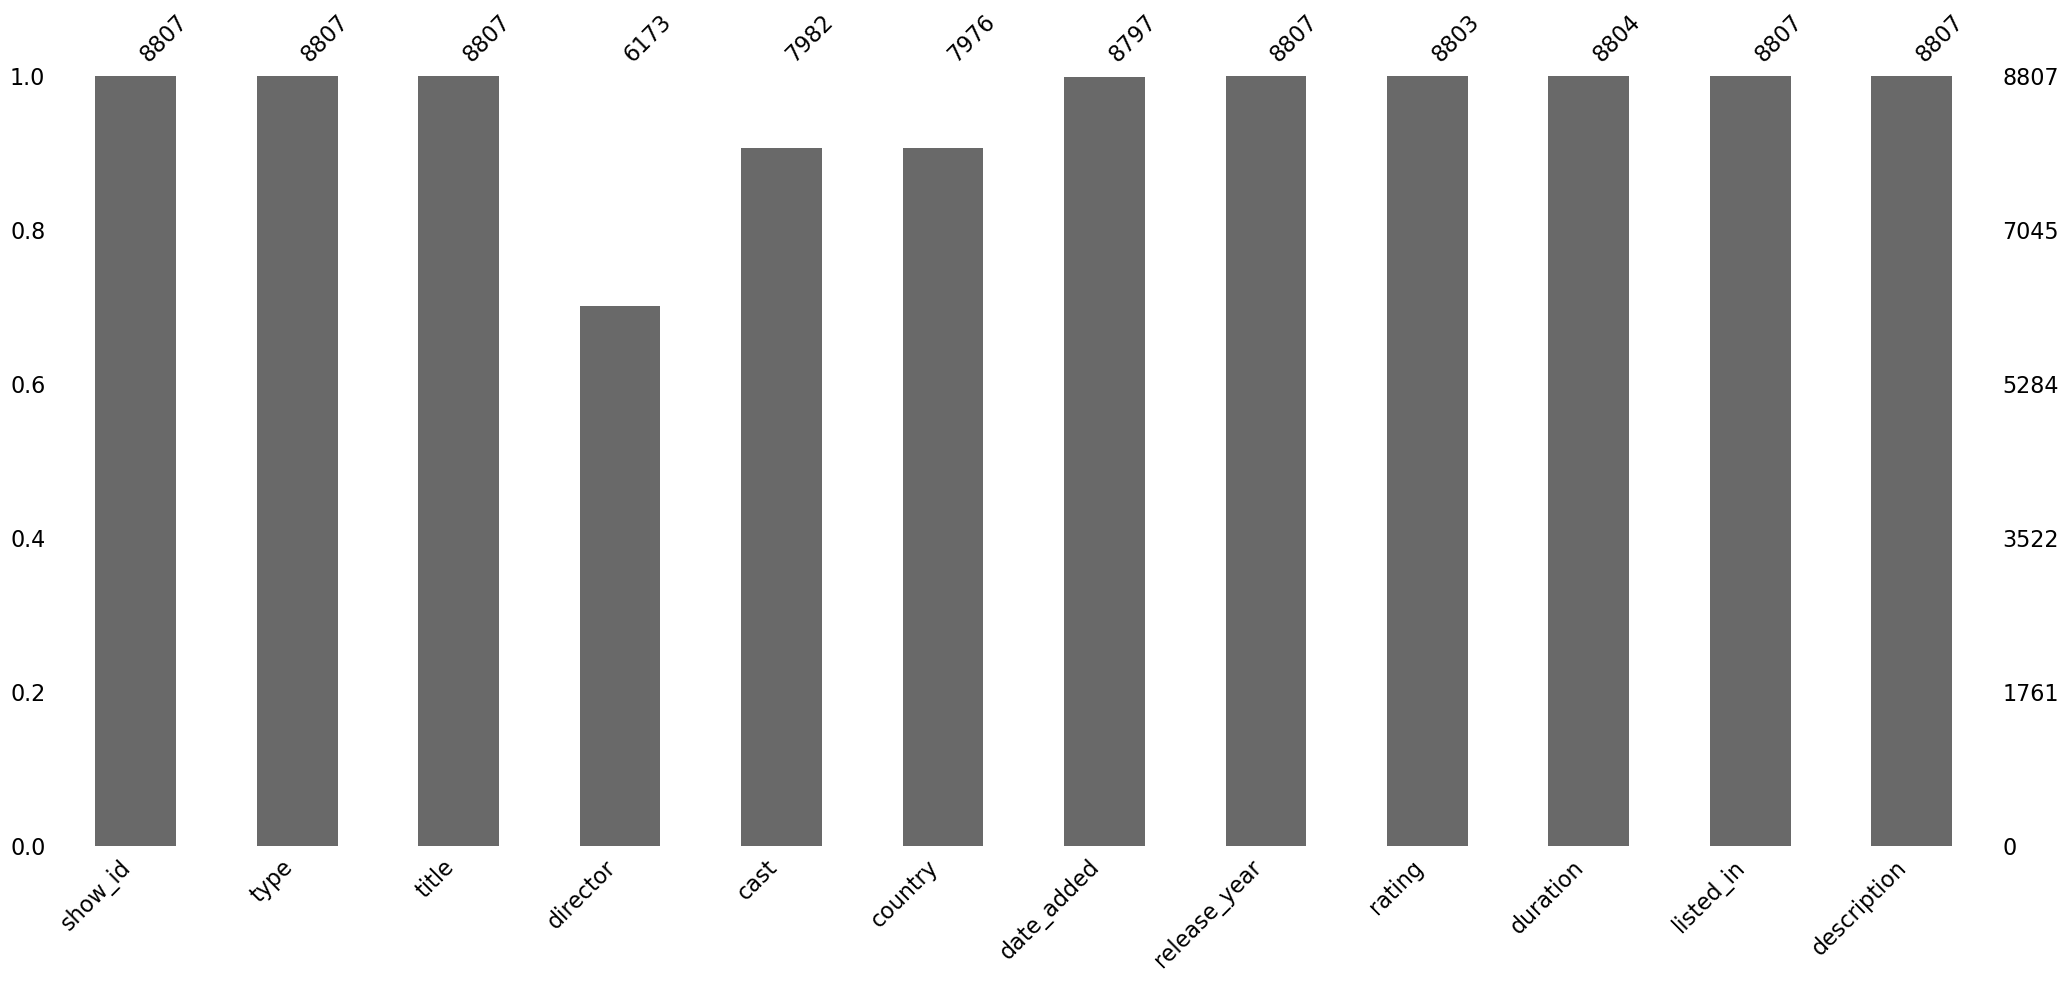

In [10]:
msno.bar(netflix)         # Shows bar chart of missing data

Our missing number plots shows that total six columns have missing values which are director, cast, country, date_added, release_year and duration.

We will be using this technique to fill the missing values.

* .fillna() - This is a technique used to fillna value with either custom value or values from data stats.

1. director - NoDataAvailable
2. cast - NoDataAvailable
3. country - mode of the county series
4. date_added - mode of the date_added
5. rating - mode of the rating
6. duration - mode of the duration


In [11]:
netflix_orig = netflix.copy() # copying original dataset 

# handling missing values
netflix['director'] = netflix['director'].fillna('NoDataAvailable')
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['cast'] = netflix['cast'].fillna('NoDataAvailable')
netflix['date_added'] = netflix['date_added'].fillna(netflix['date_added'].mode()[0])
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])
netflix['duration'] = netflix['duration'].fillna(netflix['duration'].mode()[0])

We will print the info data to check if there is other missing value

In [12]:
print('count of values')
print(netflix.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


Now we already succesfully handle the missing value

#### PART 2 - HANI KIASATINA BINTI HASSAN (52224223082) - Netflix Content Type Distribution, Netflix Content by Type and Audience, Netflix Age Ratings.

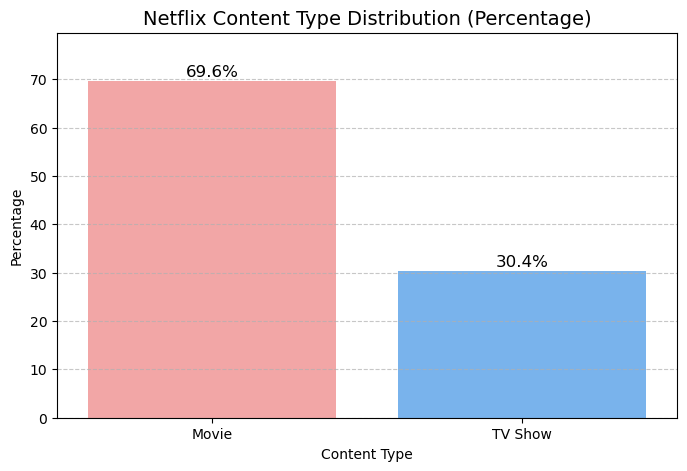

In [13]:
# Count the values
type_counts = netflix['type'].value_counts()
type_percent = (type_counts / type_counts.sum()) * 100

# Plotting
plt.figure(figsize=(8,5))
colors = ['#FF9999', '#66B3FF']  # Custom colors for Movie and TV Show

sns.barplot(x=type_percent.index, y=type_percent.values, palette=colors)

# Add percentage labels
for i, value in enumerate(type_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

# Styling
plt.title('Netflix Content Type Distribution (Percentage)', fontsize=14)
plt.ylabel('Percentage')
plt.xlabel('Content Type')
plt.ylim(0, max(type_percent.values) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar chart, titled "Netflix Content Type Distribution (Percentage)," clearly shows the breakdown of Netflix's content by type. It reveals that movies make up the large majority of Netflix's library at 69.6%, while TV shows account for the remaining 30.4%

This indicates Netflix has significantly more movies than TV series available.

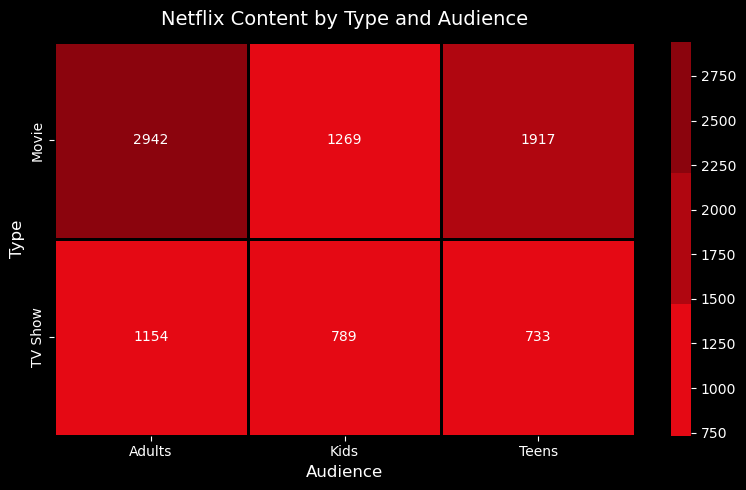

In [14]:
plt.style.use('dark_background')

# Define the rating-to-audience mapping
rating_to_audience = {
    'TV-Y': 'Kids', 'TV-Y7': 'Kids', 'TV-Y7-FV': 'Kids', 'TV-G': 'Kids',
    'G': 'Kids', 'PG': 'Kids', 'TV-PG': 'Kids',
    'PG-13': 'Teens', 'TV-14': 'Teens',
    'R': 'Adults', 'TV-MA': 'Adults', 'NC-17': 'Adults',
    'NR': 'Adults', 'UR': 'Adults'
}

# Map ratings to audience
netflix['audience'] = netflix['rating'].map(rating_to_audience)
netflix_filtered = netflix.dropna(subset=['audience'])

# Group and pivot
grouped = netflix_filtered.groupby(['type', 'audience']).size().reset_index(name='count')
pivot = grouped.pivot(index='type', columns='audience', values='count').fillna(0)

# Create heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap=sns.color_palette(["#e50914", "#b00610", "#8b040d"]),
    linewidths=1,
    linecolor='black',
    cbar=True
)

# Titles and labels
plt.title("Netflix Content by Type and Audience", fontsize=14, color='white', pad=12)
plt.xlabel("Audience", fontsize=12, color='white')
plt.ylabel("Type", fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


This chart, "Netflix Content by Type and Audience," shows how many movies and TV shows Netflix has for different groups of people. The chart is split into two main rows: "Movie" and "TV Show," and three columns for "Audience": "Adults," "Kids," and "Teens." Each box has a number and a color that tells you how many titles are in that group (redder means more titles). For movies, Netflix has the most for Adults (2942), followed by Teens (1917), and then Kids (1269). For TV shows, Adults again have the most (1154), with Kids (789) and Teens (733) having fewer.

In short, Netflix has more movies than TV shows for all age groups, and both movies and TV shows are most common for adult audiences.

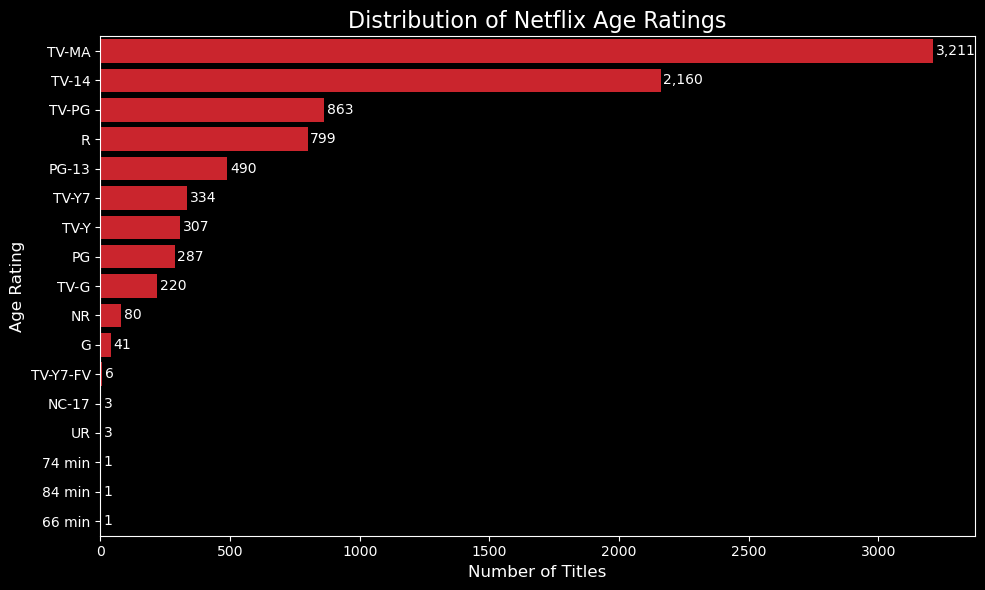

In [15]:
# Drop rows with no rating
netflix_rated = netflix.dropna(subset=['rating'])

# Count ratings
rating_counts = netflix_rated['rating'].value_counts().sort_values(ascending=False)

# Plot
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
colors = sns.color_palette(['#e50914'] * len(rating_counts))

sns.barplot(x=rating_counts.values, y=rating_counts.index, palette=colors)

# Add labels
for i, value in enumerate(rating_counts.values):
    plt.text(value + 10, i, f'{value:,}', va='center', color='white', fontsize=10)

# Customize
plt.title('Distribution of Netflix Age Ratings', fontsize=16, color='white')
plt.xlabel('Number of Titles', fontsize=12, color='white')
plt.ylabel('Age Rating', fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


This bar chart, called "Netflix Age Ratings," shows how many shows and movies Netflix has for different age groups. The bottom of the chart shows the number of titles, and the side lists the age ratings. It's clear that most of Netflix's content is for older viewers, with "TV-MA" (for mature audiences) being the most common by far, with 3,211 titles. "TV-14" (for ages 14 and up) is also very common, with 2,160 titles. Other ratings like "TV-PG," "R," and "PG-13" also have many titles. However, very strict ratings like "NC-17" and unusual categories like specific movie lengths (e.g., "74 min") have very few titles. This chart simply tells us that Netflix mostly creates or acquires content for adults and teenagers.

#### PART 3 - MOHAMAD YUSRI BIN HAMIDON (5222422311) - Content Releases, Content added by Month, Top 10 Most Common Ratings on Netflix by Type

In [16]:
TV = netflix[netflix['type'] == 'TV Show'].release_year.value_counts()
Movie = netflix[netflix['type'] == 'Movie'].release_year.value_counts()

# creating a dataframe

Tv_netflix = pd.DataFrame({'year': TV.index, 'Tv_count': TV.values})
Movie_netflix = pd.DataFrame({'year': Movie.index, 'Movie_count': Movie.values})

rel_data = pd.merge(Tv_netflix, Movie_netflix, how = 'right', on = 'year')
rel_data.fillna('0', inplace = True)
rel_data['Tv_count'] = rel_data.Tv_count.astype('int64')
rel_data = rel_data.sort_values('year', ascending = False).reset_index(drop = True)

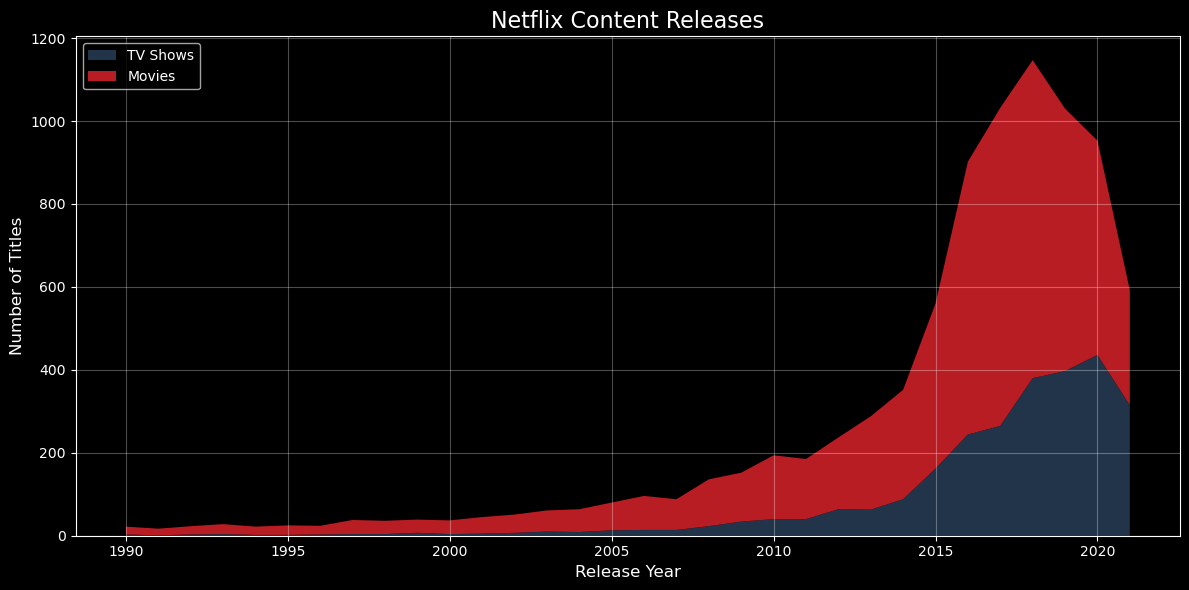

In [17]:
# Filter for year >= 2000
rel_data_sorted = rel_data[rel_data['year'] >= 1990].sort_values('year')

# Plotting
plt.figure(figsize=(12, 6))
plt.stackplot(
    rel_data_sorted['year'],
    rel_data_sorted['Tv_count'],
    rel_data_sorted['Movie_count'],
    labels=['TV Shows', 'Movies'],
    colors=['#21344a', '#b81d24']
)

# Styling
plt.title('Netflix Content Releases', fontsize=16, color='white')
plt.xlabel('Release Year', fontsize=12, color='white')
plt.ylabel('Number of Titles', fontsize=12, color='white')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.xticks(color='white')
plt.yticks(color='white')
plt.style.use('dark_background')
plt.tight_layout()
plt.show()


The stack plot shows the Netflix content release of a TV Shows or Movies. IT seems that the year from 2010 until before 2020 depicts the highest number of titles releases. The Netflix content releases started declining trend from end of 2019. Probably because of the Pandermic COVID-19 throughout the world.

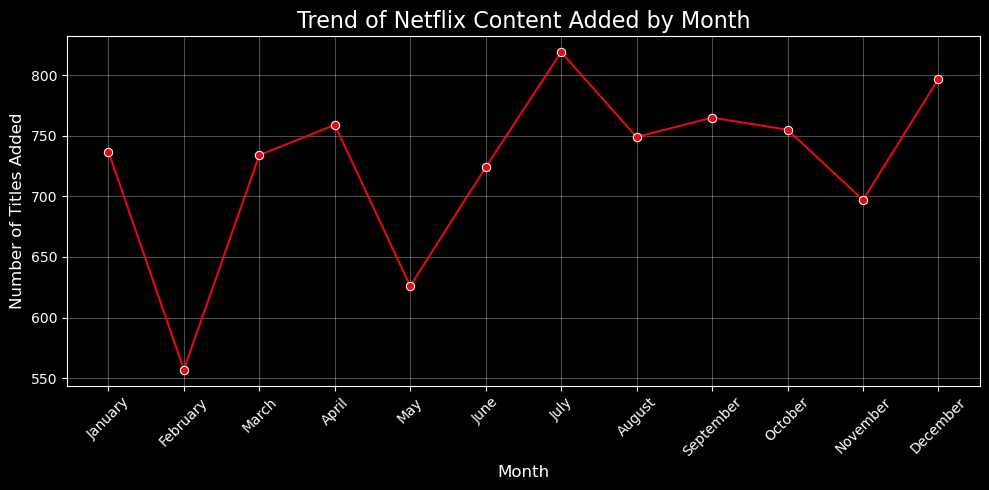

In [18]:

# Ensure date_added is datetime
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')

# Extract month name
netflix['month_added'] = netflix['date_added'].dt.month_name()

# Order months by calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Count how many items added each month
month_counts = netflix['month_added'].value_counts().reindex(month_order)

# Line Chart
plt.figure(figsize=(10, 5))
sns.lineplot(x=month_counts.index, y=month_counts.values, marker='o', color='#e50914')

plt.title('Trend of Netflix Content Added by Month', fontsize=16, color='white')
plt.xlabel('Month', fontsize=12, color='white')
plt.ylabel('Number of Titles Added', fontsize=12, color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.style.use('dark_background')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


The line chart illustrates the "Trend of Netflix Content Added by Month," revealing significant fluctuations in the number of titles added throughout the year without a consistent upward or downward trend. The year began with relatively high content additions in January, followed by a sharp drop to the lowest point in February. Content additions then rebounded strongly through March and April before experiencing another dip in May. A substantial recovery occurred in June, leading to the year's absolute peak of content additions in July. Following this peak, there was a decrease in August, with subsequent months (September and October) maintaining relatively high, though slightly declining, levels. November saw a more noticeable drop, but the year concluded with a significant surge in December, marking the second-highest month for content additions. This pattern suggests a cyclical approach to content releases, potentially driven by seasonal strategies or major content drops concentrated in specific periods, most notably in mid-summer (July) and towards the year's end (December).

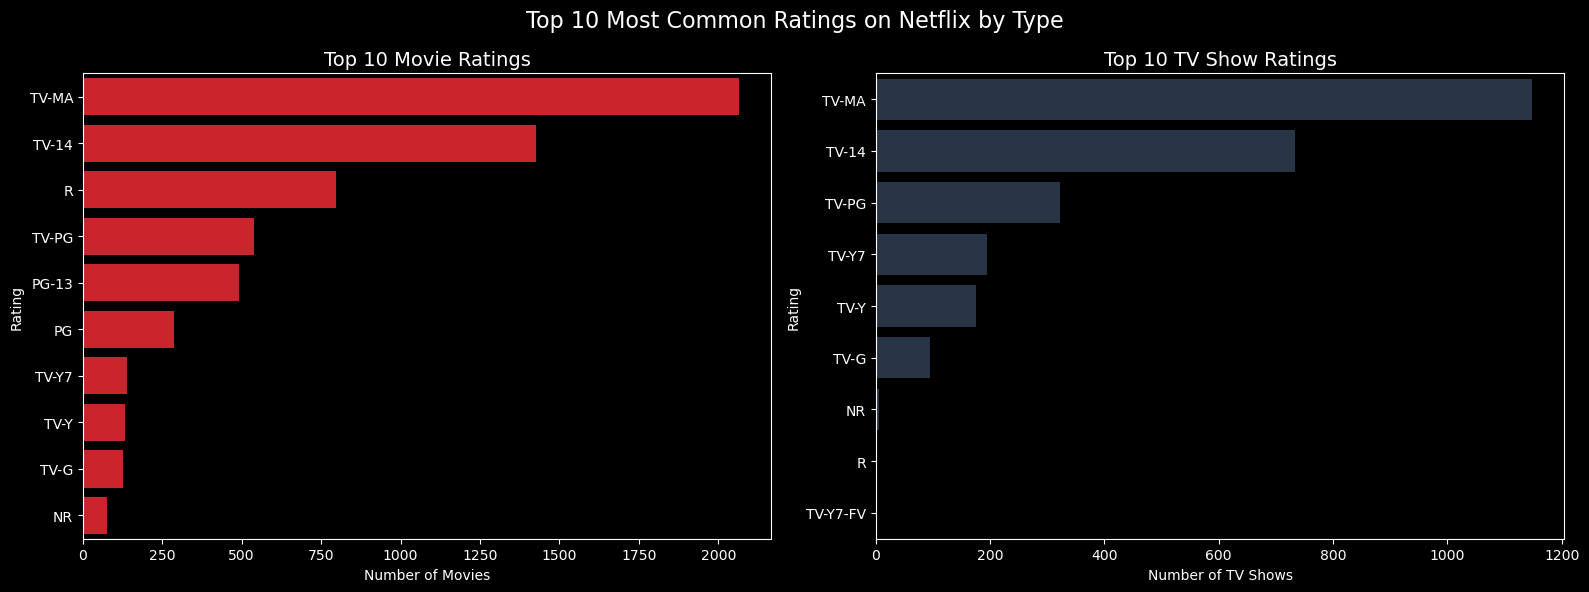

In [19]:

# Set dark background
plt.style.use('dark_background')

# Filter and count ratings
movie_ratings = netflix[netflix['type'] == 'Movie']['rating'].value_counts().head(10)
tv_ratings = netflix[netflix['type'] == 'TV Show']['rating'].value_counts().head(10)

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Movie Ratings Plot
sns.barplot(
    x=movie_ratings.values,
    y=movie_ratings.index,
    ax=axes[0],
    palette=['#e50914'] * 10
)
axes[0].set_title('Top 10 Movie Ratings', fontsize=14, color='white')
axes[0].set_xlabel('Number of Movies', color='white')
axes[0].set_ylabel('Rating', color='white')
axes[0].tick_params(colors='white')

# TV Show Ratings Plot
sns.barplot(
    x=tv_ratings.values,
    y=tv_ratings.index,
    ax=axes[1],
    palette=['#21344a'] * 10
)
axes[1].set_title('Top 10 TV Show Ratings', fontsize=14, color='white')
axes[1].set_xlabel('Number of TV Shows', color='white')
axes[1].set_ylabel('Rating', color='white')
axes[1].tick_params(colors='white')

# Show plot
plt.suptitle('Top 10 Most Common Ratings on Netflix by Type', fontsize=16, color='white')
plt.tight_layout()
plt.show()

>Left Chart: Top 10 Movie Ratings
This horizontal bar chart shows the 10 most frequent age ratings among Netflix Movies.
Each bar represents how many Movies fall under a specific rating, such as:
TV-MA (Mature Audiences)
PG-13 (Parents Strongly Cautioned)
R (Restricted)
PG (Parental Guidance)
G (General Audience), etc.

The longer the bar, the more Movies Netflix has with that rating.

>Right Chart: Top 10 TV Show Ratings
This bar chart shows the 10 most frequent ratings for TV Shows on Netflix.
Typical ratings might include:
TV-MA (Mature)
TV-14 (Teens 14+)
TV-PG (Parental Guidance)
TV-Y / TV-G (Kids content)

Again, longer bars mean more content of that rating.

#### PART 4 - MUHAMMAD HARIZ BIN ASRUL AZHAR (52224223249) - Top 15 Countries Producing Content on Netflix, Top 15 Most Common Genre in Netflix, Top 10 Cast Member on Netflix, Top 30 Netflix Directors

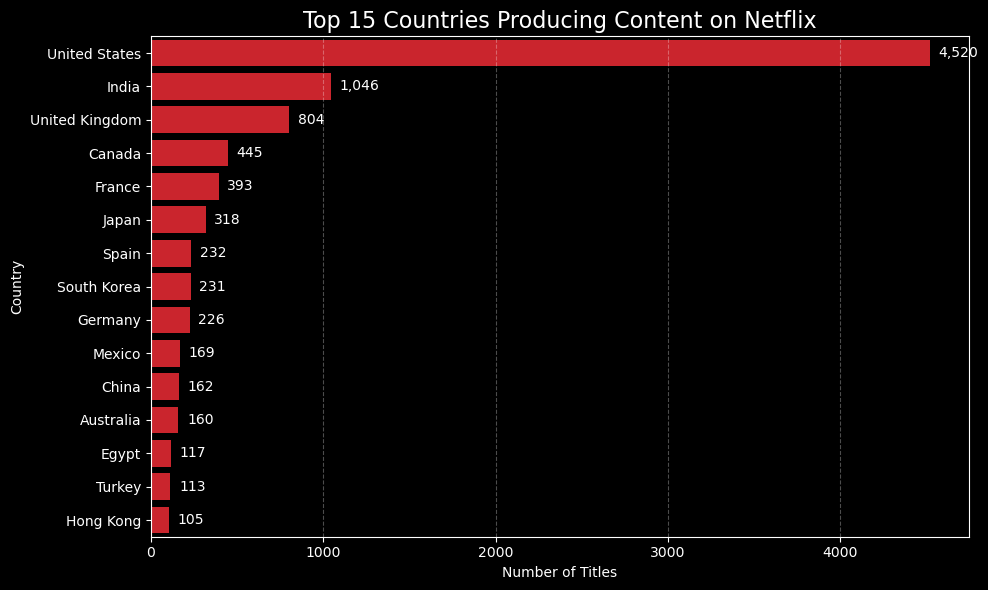

In [20]:
# Split and explode countries
country_exploded = netflix.assign(country=netflix['country'].str.split(', ')).explode('country')

# Count content per country
country_counts = country_exploded['country'].value_counts().head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
colors = ['#e50914'] * len(country_counts)

sns.barplot(x=country_counts.values, y=country_counts.index, palette=colors)

# Add value labels
for i, value in enumerate(country_counts.values):
    plt.text(value + 50, i, f'{value:,}', va='center', color='white', fontsize=10)

# Customize
plt.title('Top 15 Countries Producing Content on Netflix', fontsize=16, color='white')
plt.xlabel('Number of Titles', color='white')
plt.ylabel('Country', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


United States at the top — Netflix’s home base and biggest content provider.
India, United Kingdom, and Canada also ranking high due to large entertainment industries and regional Netflix investments.
Other countries like Japan, South Korea, France, and Australia are strong due to popular global content.

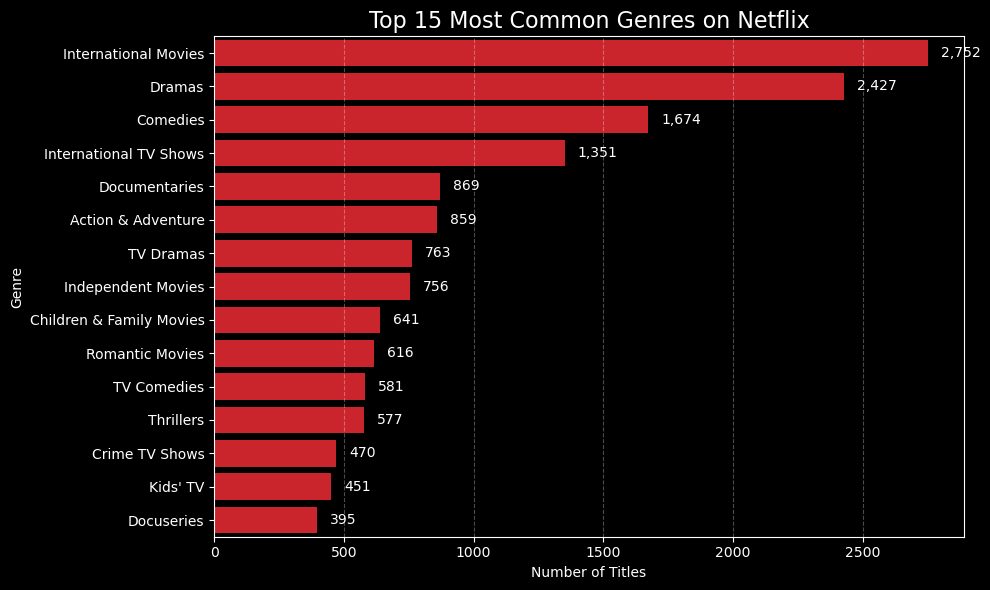

In [21]:
# Split and explode genre column
genre_exploded = netflix.assign(listed_in=netflix['listed_in'].str.split(', ')).explode('listed_in')

# Count genre occurrences
genre_counts = genre_exploded['listed_in'].value_counts().head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
colors = ['#e50914'] * len(genre_counts)

sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=colors)

# Add labels
for i, value in enumerate(genre_counts.values):
    plt.text(value + 50, i, f'{value:,}', va='center', color='white', fontsize=10)

# Customize appearance
plt.title('Top 15 Most Common Genres on Netflix', fontsize=16, color='white')
plt.xlabel('Number of Titles', color='white')
plt.ylabel('Genre', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

This bar chart, titled "Top 15 Most Common Genres on Netflix," provides a clear visual representation of the number of titles available within Netflix's most popular genres. The x-axis quantifies the "Number of Titles," while the y-axis lists the "Genre." The chart distinctly highlights that Netflix's content library is heavily weighted towards certain categories. "International Movies" lead significantly with 2,752 titles, followed closely by "Dramas" at 2,427, and "Comedies" at 1,674, indicating a strong focus on global cinema and popular narrative formats. "International TV Shows" also hold a substantial share with 1,351 titles, reinforcing Netflix's global content strategy. As one descends the list, the number of titles per genre decreases, with "Docuseries" being the least common among the top 15, accounting for 395 titles. Overall, the chart effectively illustrates Netflix's diverse yet strategically prioritized content offerings, emphasizing a robust collection of international and narrative-driven content alongside a significant presence of documentaries, action, and family-oriented programming.

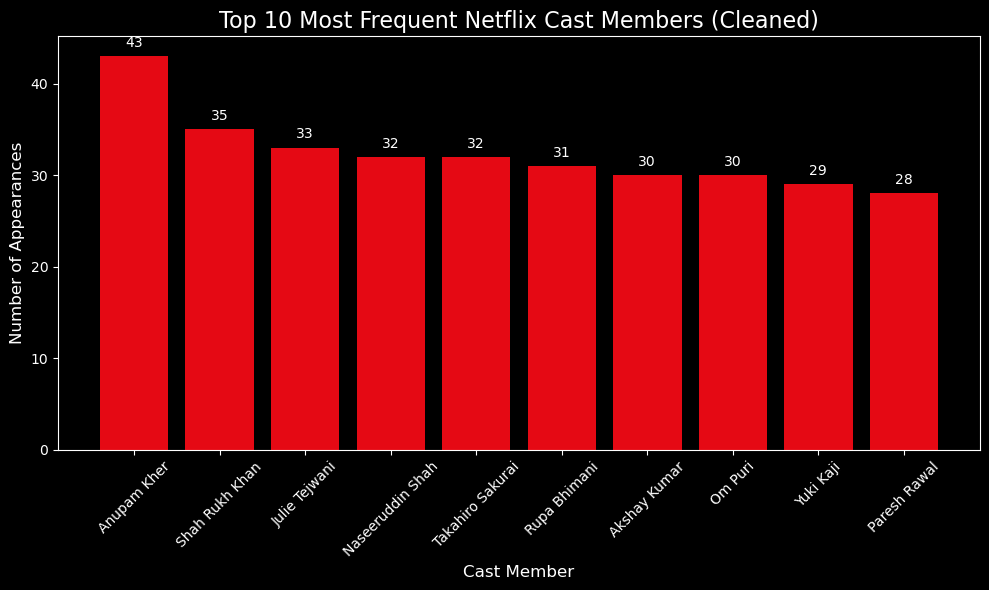

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Fill and prepare cast data
netflix['cast'] = netflix['cast'].fillna('')
cast_exploded = netflix.assign(cast=netflix['cast'].str.split(', ')).explode('cast')

# Remove invalid entries
cast_exploded = cast_exploded[~cast_exploded['cast'].isin(['', 'NoDataAvailable', 'Unknown'])]

# Count top 10 cast members
cast_counts = cast_exploded['cast'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(cast_counts.index, cast_counts.values, color='#e50914')

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', color='white', fontsize=10)

# Customize appearance
plt.title('Top 10 Most Frequent Netflix Cast Members (Cleaned)', fontsize=16, color='white')
plt.xlabel('Cast Member', fontsize=12, color='white')
plt.ylabel('Number of Appearances', fontsize=12, color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.style.use('dark_background')
plt.tight_layout()
plt.show()


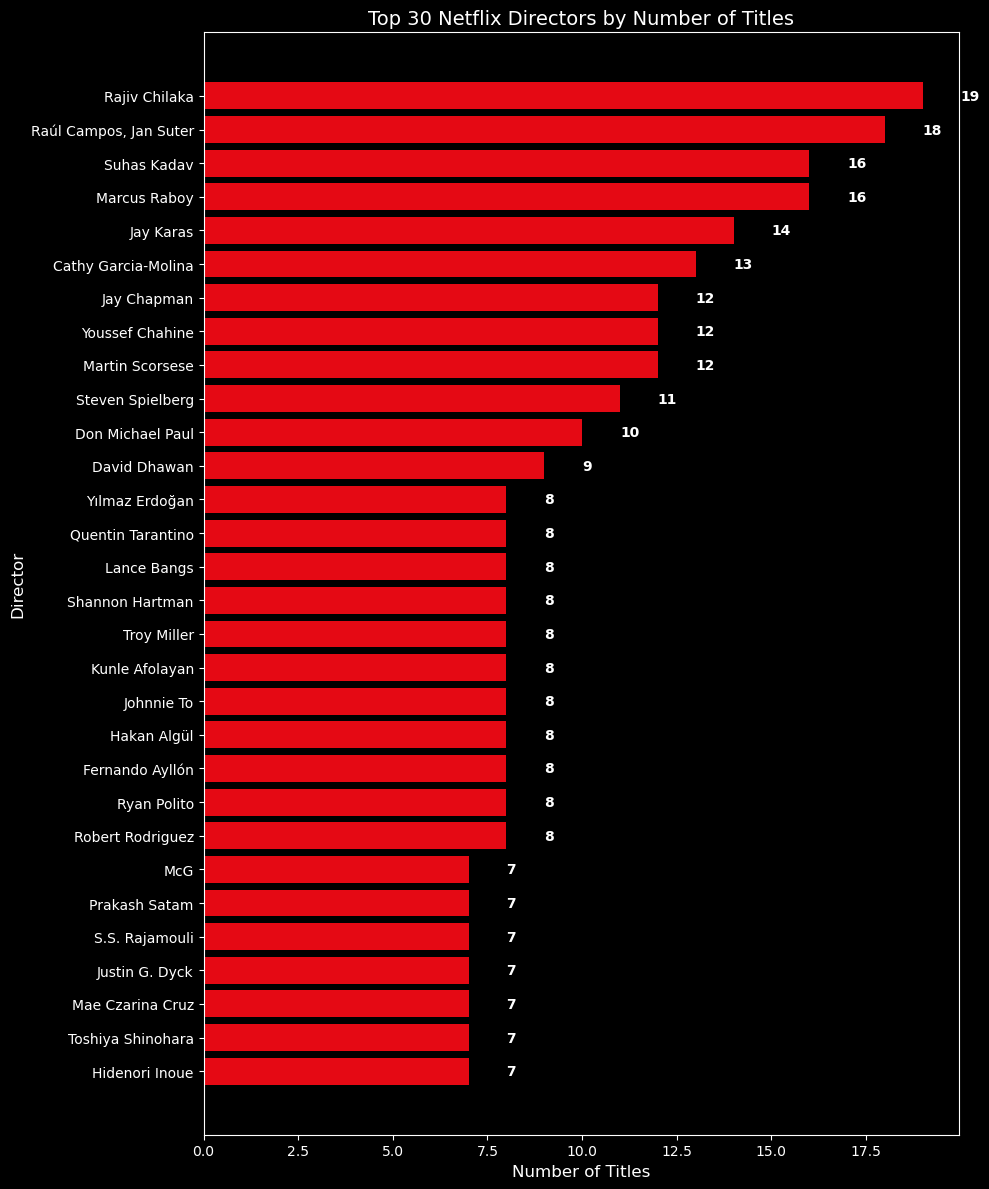

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'director' column has no NaNs
netflix['director'] = netflix['director'].fillna('NoDataAvailable')

# Get top 30 directors (excluding the first if it's 'No Data Available')
top_directors = netflix['director'].value_counts()[1:31]

# Plot
plt.figure(figsize=(10, 12))
bars = plt.barh(top_directors.index, top_directors.values, color='#e50914')

# Add count numbers at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             str(int(width)),
             va='center', color='white', fontsize=10, fontweight='bold')

# Add title and labels
plt.title('Top 30 Netflix Directors by Number of Titles', fontsize=14, color='white')
plt.xlabel('Number of Titles', fontsize=12, color='white')
plt.ylabel('Director', fontsize=12, color='white')

# Style: Netflix dark theme
plt.gca().invert_yaxis()  # Highest at top
plt.style.use('dark_background')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()



This bar chart, titled "Top 30 Netflix Directors by Number of Titles," displays a ranking of directors based on the quantity of their titles available on Netflix. The y-axis lists the "Director" names, while the x-axis represents the "Number of Titles." The chart clearly indicates that a few directors have a significantly higher number of titles on the platform compared to the rest. Rajiv Chilaka leads the list with an impressive 18 titles, followed closely by Raúl Campos, Jan Suter with 16 titles, and Suhas Kadav and Marcus Raboy, both also with 16 titles. The number of titles generally decreases as one moves down the list, with a large cluster of directors having 8 titles, and an even larger group at the bottom with 7 titles, including notable names like Robert Rodriguez and Quentin Tarantino in the broader range. This distribution suggests that while Netflix features a wide array of directors, a select group of creators contribute a substantial portion of the available content, potentially indicating ongoing collaborations or a focus on certain production pipelines.

#### CONCLUSION

In conclusion, Netflix's content focus on movies, which the majority of the content is 70%, far surpassing TV shows. The platform is to adult and teenage audiences, with "TV-MA" and "TV-14" being the most prevalent age ratings. 

In terms of content genres, Netflix heavily emphasizes "International Movies" and "Dramas," followed by "Comedies" and "International TV Shows," indicating a strong global acquisition and production strategy. This is further supported by the most frequent cast members, prominently featuring Indian and Japanese actors.

Finally, the trend of content additions shows a fluctuating pattern throughout the year, with notable peaks in July and December, suggesting strategic content drops or seasonal release schedules rather than a consistent linear growth in new titles.